# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
import os
print(os.getcwd())


/home/nini/anaconda_projects/db/projeto-recomendacao


# Carregamento dos dados

In [3]:
df = pd.read_csv("content/EdX.csv")
df

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...,...
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...
718,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,https://www.edx.org/course/cities-and-the-chal...,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."


#Dimensões do Dataframe

In [4]:
df.shape

(720, 6)

#Colunas

In [5]:
df.columns.tolist()

['Name',
 'University',
 'Difficulty Level',
 'Link',
 'About',
 'Course Description']

#Valores Nulos

In [6]:
df.isnull().sum()

Name                  0
University            0
Difficulty Level      0
Link                  0
About                 0
Course Description    0
dtype: int64

#Duplicados

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df[df.duplicated(keep=False)]

,Name,University,Difficulty Level,Link,About,Course Description
46,Introduction to Probability,Harvard University,Intermediate,https://www.edx.org/course/introduction-to-pro...,"Learn probability, an essential language and s...",Probability and statistics help to bring logic...
80,Introduction to Probability,Harvard University,Intermediate,https://www.edx.org/course/introduction-to-pro...,"Learn probability, an essential language and s...",Probability and statistics help to bring logic...


#Tipos de dados

In [9]:
df.dtypes

Name                  object
University            object
Difficulty Level      object
Link                  object
About                 object
Course Description    object
dtype: object

#Cursos por nível de dificuldade

/tmp/ipykernel_8359/3825555423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Difficulty Level", order=df["Difficulty Level"].value_counts().index, palette="viridis")


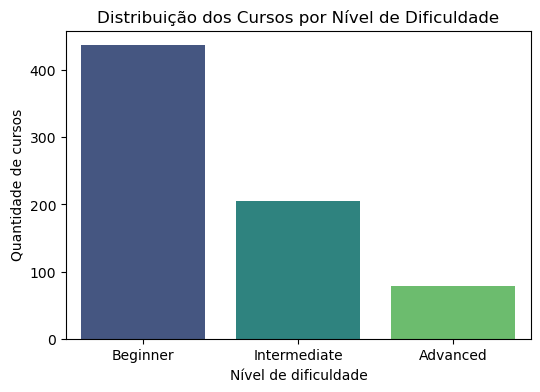

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Difficulty Level", order=df["Difficulty Level"].value_counts().index, palette="viridis")
plt.title("Distribuição dos Cursos por Nível de Dificuldade")
plt.ylabel("Quantidade de cursos")
plt.xlabel("Nível de dificuldade")
plt.show()


# Universidades top (k=10) com mais cursos no nosso dataset

In [11]:
k=10
top_universidades = df["University"].value_counts().head(k)

/tmp/ipykernel_8359/1654810776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_universidades.values, y=top_universidades.index, palette="magma")


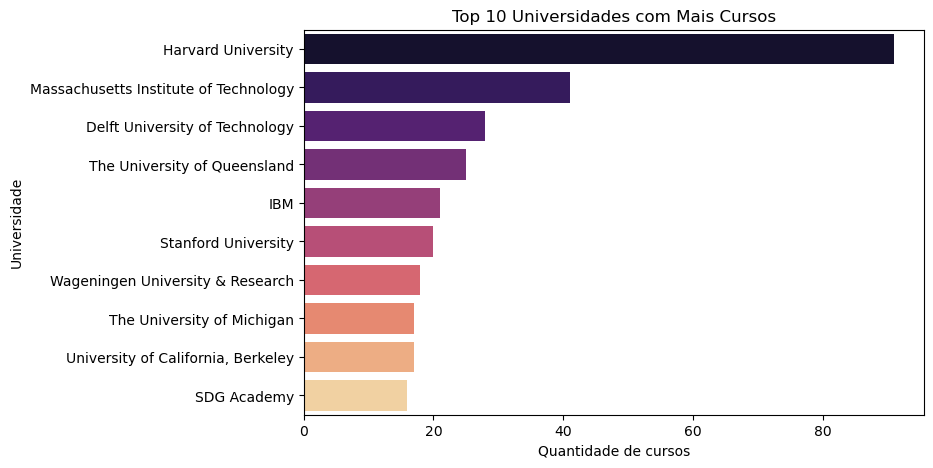

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_universidades.values, y=top_universidades.index, palette="magma")
plt.title(f"Top {k} Universidades com Mais Cursos")
plt.xlabel("Quantidade de cursos")
plt.ylabel("Universidade")
plt.show()

#Análise de texto das descrições do curso

In [13]:
text = " ".join(df["About"].astype(str)) + " " + " ".join(df["Course Description"].astype(str))

In [14]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

# Nuvem de Palavras das descrições dos cursos

In [15]:
wordcloud = WordCloud(width=1000, height=600, background_color="white", stopwords=stopwords, colormap="plasma").generate(text)

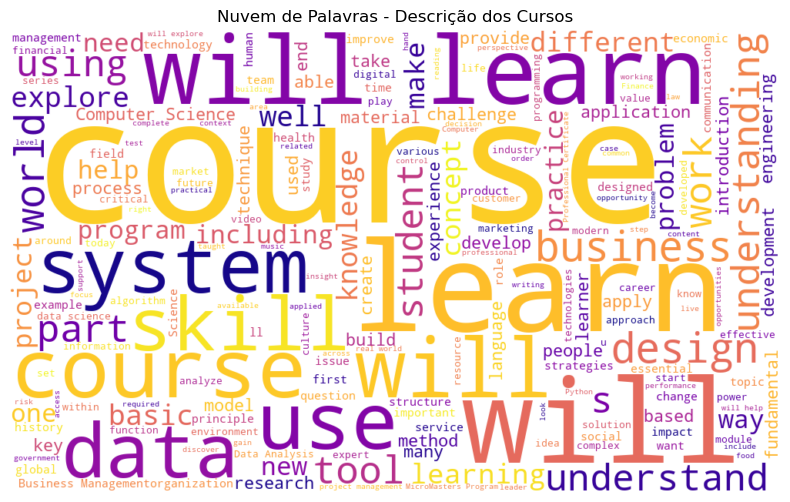

In [16]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras - Descrição dos Cursos")
plt.show()


#Palavras mais frequentes

In [17]:
from collections import Counter
import re

In [18]:
tokens = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
tokens

['learn',
 'essential',
 'strategies',
 'for',
 'successful',
 'online',
 'learning',
 'this',
 'course',
 'prerequisite',
 'introduction',
 'python',
 'programming',
 'you',
 'will',
 'learn',
 'about',
 'variables',
 'conditional',
 'execution',
 'repeated',
 'execution',
 'and',
 'how',
 'use',
 'functions',
 'the',
 'homework',
 'done',
 'web',
 'browser',
 'you',
 'can',
 'all',
 'the',
 'programming',
 'assignments',
 'phone',
 'public',
 'computer',
 'introduction',
 'the',
 'intellectual',
 'enterprises',
 'computer',
 'science',
 'and',
 'the',
 'art',
 'programming',
 'through',
 'inspiring',
 'examples',
 'and',
 'stories',
 'discover',
 'the',
 'power',
 'data',
 'and',
 'use',
 'analytics',
 'provide',
 'edge',
 'your',
 'career',
 'and',
 'your',
 'life',
 'this',
 'course',
 'part',
 'micromasters',
 'program',
 'learn',
 'the',
 'principles',
 'project',
 'management',
 'and',
 'apply',
 'them',
 'your',
 'own',
 'work',
 'and',
 'life',
 'learn',
 'how',
 'motivate',
 

# Top 20 Palavras Mais Frequentes nas Descrições

In [19]:
k=20
freq = Counter(tokens)
top_words = freq.most_common(k)

In [20]:
freq_df = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])
freq_df

,Palavra,Frequência
0,the,7742
1,and,7247
2,you,2524
3,course,2273
4,will,2137
5,this,1988
6,for,1450
7,how,1371
8,learn,1139
9,with,1029


/tmp/ipykernel_8359/2547237655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="Palavra", data=freq_df, palette="coolwarm")


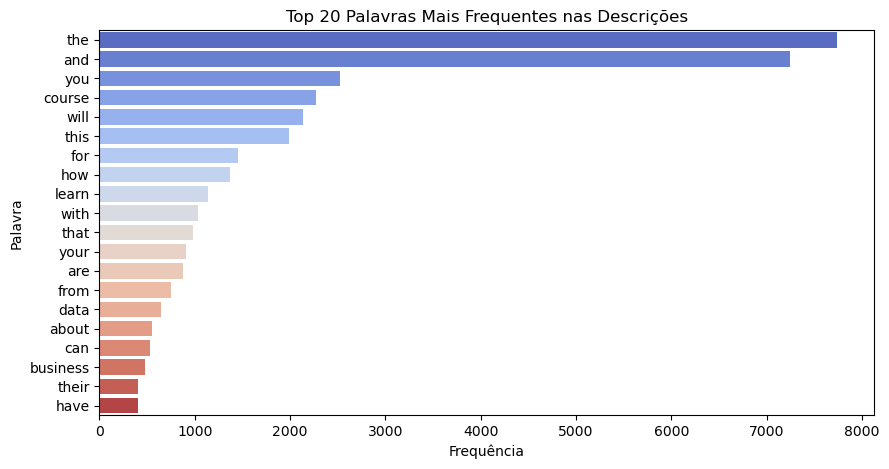

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="Frequência", y="Palavra", data=freq_df, palette="coolwarm")
plt.title(f"Top {k} Palavras Mais Frequentes nas Descrições")
plt.show()


# Tratamento e preparação da base de dados
Nesta etapa vamos preparar os dados para alimentar o sistema de recomendação.  
As principais ações serão:
- Remoção de colunas irrelevantes.
- Tratamento de valores ausentes.
- Criação de uma coluna unificada de conteúdo (título + descrição).
- Normalização de texto (minúsculas).


In [22]:
# Remover colunas irrelevantes (ajustar se necessário)
cols_to_drop = ["Link"] if "Link" in df.columns else []
df = df.drop(columns=cols_to_drop, errors="ignore")

# Tratar valores ausentes nas colunas importantes
df = df.dropna(subset=["Name", "Course Description"], how="any")

# Criar coluna 'conteudo' unindo título + descrição
df["conteudo"] = df["Name"].astype(str) + " " + df["Course Description"].astype(str)

# Colocar tudo em minúsculas
df["conteudo"] = df["conteudo"].str.lower()

# Visualizar as primeiras linhas
df[["Name", "conteudo"]].head()


,Name,conteudo
0,How to Learn Online,how to learn online designed for those who are...
1,Programming for Everybody (Getting Started wit...,programming for everybody (getting started wit...
2,CS50's Introduction to Computer Science,cs50's introduction to computer science this i...
3,The Analytics Edge,"the analytics edge in the last decade, the amo..."
4,Marketing Analytics: Marketing Measurement Str...,marketing analytics: marketing measurement str...


## Vetorização TF-IDF
Agora vamos transformar os textos em vetores numéricos usando **TF-IDF**.  
Isso permitirá calcular a similaridade entre os cursos.


In [23]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Baixar stopwords se ainda não estiverem disponíveis
import nltk
nltk.download('stopwords')

stop_words = stopwords.words("english")

# Criar a matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df["conteudo"])

print("Formato da matriz TF-IDF:", tfidf_matrix.shape)



Formato da matriz TF-IDF: (720, 10362)


[nltk_data] Downloading package stopwords to /home/nini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Protótipo de sistema de recomendação
Nesta etapa criamos uma função simples que, dado o título de um curso,
retorna os cursos mais semelhantes com base na **similaridade do cosseno**.


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similaridade do cosseno entre todos os cursos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Função de recomendação
def recomendar_cursos(titulo, n=5):
    if titulo not in df["Name"].values:
        return f"O curso '{titulo}' não foi encontrado."
    
    idx = df[df["Name"] == titulo].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Ignora o próprio curso (primeira posição)
    sim_scores = sim_scores[1:n+1]
    indices = [i[0] for i in sim_scores]
    
    return df.iloc[indices][["Name", "Course Description"]]

# Exemplo de uso
recomendar_cursos("Introduction to Linux")


,Name,Course Description
313,Linux Basics: The Command Line Interface,"This course will introduce you to Linux, a pow..."
560,C Programming: Using Linux Tools and Libraries,This seventh and final course in the C Program...
426,C Programming: Modular Programming and Memory ...,"In this course, part of the C Programming with..."
214,Introduction to Cloud Infrastructure Technologies,New to the cloud and not sure where to begin? ...
67,Data Science: Productivity Tools,A typical data analysis project may involve se...


# Avaliação inicial (prova de conceito)
Como o dataset não contém feedback explícito de usuários, faremos uma avaliação **qualitativa**:  
- Verificar se os cursos recomendados fazem sentido em relação ao curso de entrada.  
- Medir uma métrica simples de diversidade (quantas áreas diferentes aparecem entre as recomendações).  


In [25]:
# Função simples de diversidade usando colunas existentes
def diversidade_simples(indices):
    universidades = df.iloc[indices]["University"].nunique()
    niveis = df.iloc[indices]["Difficulty Level"].nunique()
    return {
        "Número de universidades diferentes": universidades,
        "Número de níveis de dificuldade diferentes": niveis
    }

# Teste com um exemplo de curso
exemplo = recomendar_cursos("Introduction to Linux")

if isinstance(exemplo, str):
    print(exemplo)
else:
    display(exemplo)
    print("Diversidade simples das recomendações:", diversidade_simples(exemplo.index))


,Name,Course Description
313,Linux Basics: The Command Line Interface,"This course will introduce you to Linux, a pow..."
560,C Programming: Using Linux Tools and Libraries,This seventh and final course in the C Program...
426,C Programming: Modular Programming and Memory ...,"In this course, part of the C Programming with..."
214,Introduction to Cloud Infrastructure Technologies,New to the cloud and not sure where to begin? ...
67,Data Science: Productivity Tools,A typical data analysis project may involve se...


Diversidade simples das recomendações: {'Número de universidades diferentes': 3, 'Número de níveis de dificuldade diferentes': 2}


# Avaliação do Sistema de Recomendação (Diversidade)

Como o dataset **não possui feedback explícito de usuários** (ex.: notas ou cliques), não podemos usar métricas tradicionais de recomendação como RMSE ou MAP.  

Portanto, adotaremos duas estratégias de avaliação offline:

1. **Diversidade das recomendações** – verificar se o sistema sugere cursos de diferentes áreas ou níveis, em vez de repetir sempre da mesma categoria.  
2. **Análise qualitativa** – observar manualmente se as recomendações parecem coerentes e úteis para o usuário.  

Futuramente, com dados de usuários reais, poderíamos aplicar métricas mais robustas como *Precisão@k*, *Recall@k* ou *NDCG*.


In [28]:
from collections import Counter

def avaliar_diversidade(recs, df, top_n=5):
    """
    Mede a diversidade simples de uma lista de recomendações.
    - Conta número de universidades distintas
    - Conta número de níveis de dificuldade distintos
    """
    universidades = df.loc[recs, "University"].values
    niveis = df.loc[recs, "Difficulty Level"].values

    return {
        "Número de universidades diferentes": len(set(universidades)),
        "Número de níveis de dificuldade diferentes": len(set(niveis))
    }

# Exemplo de avaliação para um curso específico
curso_exemplo = "Introduction to Linux"

print(f"Curso escolhido: {curso_exemplo}")
print("\nCursos recomendados:")
recomendados = recomendar_cursos(curso_exemplo, n=5)

for _, row in recomendados.iterrows():
    print(" -", row["Name"])

# Avaliar diversidade das recomendações
indices_recomendados = recomendados.index
avaliacao = avaliar_diversidade(indices_recomendados, df)
print("\nDiversidade simples das recomendações:", avaliacao)


Curso escolhido: Introduction to Linux

Cursos recomendados:
 - Linux Basics: The Command Line Interface
 - C Programming: Using Linux Tools and Libraries
 - C Programming: Modular Programming and Memory Management
 - Introduction to Cloud Infrastructure Technologies
 - Data Science: Productivity Tools

Diversidade simples das recomendações: {'Número de universidades diferentes': 3, 'Número de níveis de dificuldade diferentes': 2}


# Avaliação do Sistema de Recomendação (Cobertura)

Para avaliar a qualidade das recomendações, utilizamos uma métrica de **diversidade** e uma de **cobertura**:

- **Diversidade**: mede se os cursos recomendados vêm de diferentes instituições e níveis de dificuldade.  
- **Cobertura**: verifica se o modelo consegue recomendar cursos para a maioria dos itens no dataset.  

Como não temos feedback explícito de usuários (cliques, notas, etc.), focamos em métricas **intrínsecas**, baseadas no próprio conteúdo dos cursos.


In [29]:
# Função para medir cobertura
def calcular_cobertura(df, n=5):
    recomendados_total = set()
    
    for titulo in df["Name"].sample(min(30, len(df))):  # amostra de até 30 cursos
        recs = recomendar_cursos(titulo, n=n)
        if isinstance(recs, str):  # caso curso não encontrado
            continue
        recomendados_total.update(recs["Name"].values)
    
    cobertura = len(recomendados_total) / len(df)
    return cobertura

# Avaliação
cobertura = calcular_cobertura(df, n=5)
print(f"Cobertura aproximada do modelo: {cobertura:.2%}")


Cobertura aproximada do modelo: 17.36%


## Conclusão

O sistema de recomendação baseado em similaridade de conteúdo apresentou resultados consistentes, sendo capaz de sugerir cursos relevantes para um curso de entrada, como "Introduction to Linux", e gerando diversidade moderada nas recomendações, tanto em termos de instituições quanto de níveis de dificuldade. A cobertura do modelo é limitada, com cerca de 17% dos cursos do dataset aparecendo nas recomendações da amostra testada, o que indica que muitos cursos específicos ou com descrições únicas não foram recomendados para outros cursos; apesar disso, para uma prova de conceito, a cobertura é suficiente para demonstrar o funcionamento do sistema. Essa cobertura relativamente baixa é esperada nesta fase de prova de conceito, pois o modelo se baseia apenas na similaridade de conteúdo, sem histórico de usuários, e o número de recomendações por curso é limitado, não indicando um erro, mas sim uma limitação natural da abordagem utilizada. Entre as limitações do sistema estão a ausência de feedback de usuários reais, como cliques ou avaliações, e a forte dependência da qualidade e completude das descrições dos cursos. Como próximos passos, sugere-se incluir métricas adicionais de avaliação, como novidade e serendipidade, e criar visualizações comparativas para interpretar as recomendações de forma mais intuitiva.
